## Random Forest Model

In [2]:
# import libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.inspection import PartialDependenceDisplay

First we import the 2010 and 2020 dataset created in these notebooks: 2010 and 2020

In [3]:
# read in data
parceldata_10=pd.read_csv('all_data_joined_2010.csv')

# need to set APN to be index so that we can join this back to other information later on
parceldata_10.set_index('APN',inplace=True)
parceldata_10.columns

C:\Users\lucyb\AppData\Local\Temp\ipykernel_20120\1023464178.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  parceldata_10=pd.read_csv('all_data_joined_2010.csv')


Index(['GEO_ID', 'LAND_VALUE', 'distances', 'building_class', 'year', 'acres',
       'sqft', 'num_warehouses', 'warehouse_start', 'buit_within_decade',
       ...
       'tract_y_y', 'Percent Employee of private company workers',
       'Percent Self-employed in own incorporated business workers',
       'Percent Private not-for-profit wage and salary workers',
       'Percent Local government workers', 'Percent State government workers',
       'Percent Federal government workers',
       'Percent Self-employed in own not incorporated business workers',
       'Percent Unpaid family workers', 'geometry_census'],
      dtype='object', length=109)

In [4]:
parceldata_10 = parceldata_10.rename(columns = {'buit_within_decade': 'built_within_decade'})

In [5]:
# Create a dataset for data as of 2020
parceldata_20=pd.read_csv('data/all_data_joined_2020.csv')

# need to set APN to be index so that we can join this back to other information later on
parceldata_20.set_index('APN',inplace=True)


C:\Users\lucyb\AppData\Local\Temp\ipykernel_20120\3700523532.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  parceldata_20=pd.read_csv('data/all_data_joined_2020.csv')


In [6]:
parceldata_20 = parceldata_20.rename(columns = {'buit_within_decade': 'built_within_decade'})

### Train Random Forest Model with 2010 Dataset

Here we set up the training model by specifying the x and y variables to use and creating a train/test split

Use top 20 feature importances found in test model to run a model with fewer columns

In [7]:
#subset parceldata10 to run model with only top 20 feature importances
parceldata_10 = parceldata_10[['LAND_VALUE', 'ACRES', 'dollars_per_acre', 'distances', 'lon', 'lat',
       'IL_RATIO', 'warehouse_start', 'Industrial', 'Vacant',
       'Percent $10,000-$14,999', 'Percent $100,000 - $124,999',
       'Percent White alone', 'Percent Some other race alone',
       'Percent some_college', 'Percent less_highschool',
       'Percent Renter Occupied', 'Percent No schooling completed',
       'Percent Two or more races:', 'Percent Owner Occupied', 'built_within_decade']]
                            


In [8]:
#same for parceldata20, 
parceldata_20 = parceldata_20[['LAND_VALUE', 'ACRES', 'dollars_per_acre', 'distances', 'lon', 'lat',
       'IL_RATIO', 'warehouse_start', 'Industrial', 'Vacant',
       'Percent $10,000-$14,999', 'Percent $100,000 - $124,999',
       'Percent White alone', 'Percent Some other race alone',
       'Percent some_college', 'Percent less_highschool',
       'Percent Renter Occupied', 'Percent No schooling completed',
       'Percent Two or more races:', 'Percent Owner Occupied', 'built_within_decade']]

In [9]:
# define variables 
cols=parceldata_10.columns.to_list()
xvars=[col for col in cols if col not in ('APN', 'built_within_decade')]
yvar = 'built_within_decade'

# create a dataframe with no NaNs
parceldata_10_model = parceldata_10[xvars+[yvar]].dropna()

# create train-test split
X_train, X_test, y_train, y_test = train_test_split(
    parceldata_10_model[xvars], parceldata_10_model[yvar], test_size = 0.25, random_state = 1)

Now we run the model and use it to make predictions with the test dataset

In [10]:
# initialize the random forest classifer object
rf = RandomForestClassifier(n_estimators = 50, random_state = 1)

# fit the model
rf.fit(X_train, y_train)

# apply predictions to test dataset
y_pred = rf.predict(X_test)

In [11]:
# stop if the length of the predictions doesn't match the training dataset
assert len(X_test)==len(y_pred)

We used a Confusion Matrix for an initial assessment of performance

Predicted fraction True: 0.0001. Actual fraction True: 0.0003


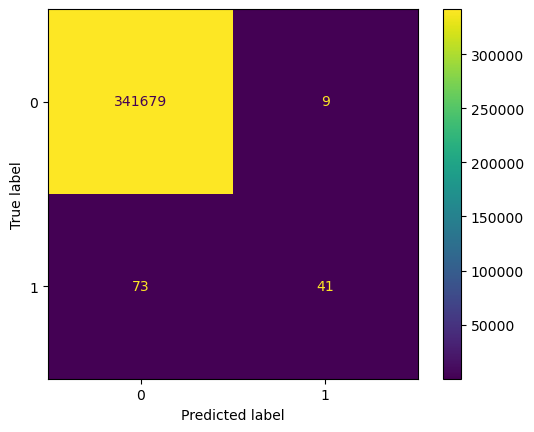

In [12]:
print('Predicted fraction True: {:.4f}. Actual fraction True: {:.4f}'.format(
    y_pred.mean(), y_test.mean()))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.savefig('figures/rf_confusion_census.png',bbox_inches="tight",transparent=True)

We used the feature importances to identify variables worth looking into further

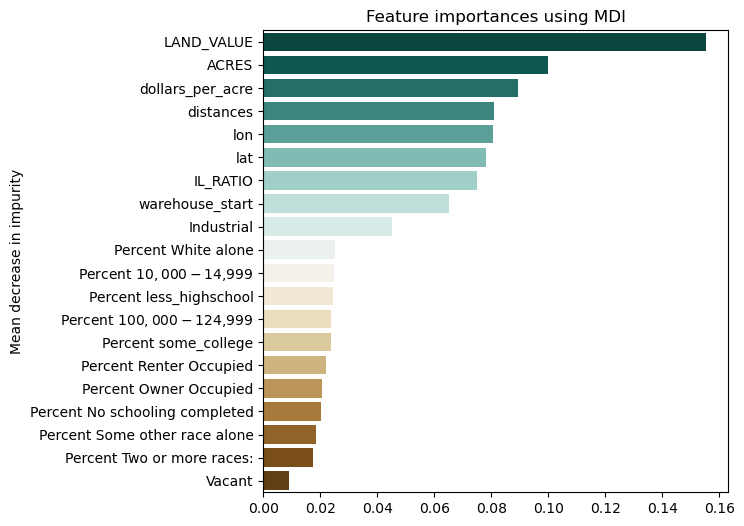

In [13]:
# create series of importances
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances.sort_values(inplace=True, ascending=False)

#plot
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=forest_importances[:20].values, y=forest_importances[:20].index, palette=sns.color_palette("BrBG_r",n_colors=20), ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

plt.savefig('figures/rf_featureimportance_census.png',bbox_inches="tight",transparent=True)

### Apply Model to 2020 Dataset

In [ ]:
# define variables 
cols=parceldata_20.columns.to_list()
xvars=[col for col in cols if col not in ('APN', 'built_within_decade')]
yvar = 'built_within_decade'

# create a dataframe with no NaNs
parceldata_20_model = parceldata_20[xvars+[yvar]].dropna()

We now use the same RF model from before to predict the percent chance that a warehouse will be built within a decade on the 2020 data

In [ ]:
# apply predictions from previous model to test dataset
X_test=parceldata_20_model[xvars]
y_pred = rf.predict(X_test)

In [ ]:
# stop if lengths don't match
assert len(X_test)==len(y_pred)
# how many does it predict?
print('Predicted fraction True: {:.4f}'.format(y_pred.mean()))
print('Predicted number True: {:.0f}'.format(y_pred.sum()))

We will now create a dataframe of predictions to be able to visualize the results

In [ ]:
# create a dataframe of predictions about whether or not a parcel will have a warehouse built on it within 10 years & join this to the full df
predictions = pd.DataFrame(rf.predict_proba(X_test),columns = ['pred_noWH', 'pred_WH'])
predictions= predictions.join((X_test).reset_index())
predictions.set_index('APN',inplace=True)
predictions.head()

In [ ]:
# not a whole lot actally predicted to become warehouses... maybe visualize percentages above a certain point if census data doesn't fix
print(len(predictions[predictions.pred_WH>0.5]))
print(len(predictions[predictions.pred_WH>0.25]))

In [ ]:
# save her!!!!
predictions.to_csv('predictionstop20.csv')